## load functions

In [1]:
import numpy as np
import pandas as pd
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
# import our modules
from utils import vis_tsne, plot_elbow, vis_umap

def run_kmeans(X, cluster_num, init='random', n_init=10, max_iter=300,tol=1e-4,random_state=1234):
    km = KMeans(
            n_clusters=cluster_num, init=init,
            n_init=n_init, max_iter=max_iter, 
            tol=tol, random_state=random_state
        )
    y_km = km.fit_predict(X)
    return km, y_km

def search_k_means_cluster(X, min_num, max_num):
    distortions = []
    silhouette_score_list = []
    for i in range(min_num,max_num):
        km, y_km = run_kmeans(X, i)
        distortions.append(km.inertia_)
        tmp_score = silhouette_score(X, y_km)
        silhouette_score_list.append(tmp_score)
        print("For n_clusters = {}, silhouette score is {}".format(i, tmp_score))
    return distortions, silhouette_score_list

## Select a range of clusters and plot elblow

For n_clusters = 2, silhouette score is 0.681046169211746
For n_clusters = 3, silhouette score is 0.5528190123564091
For n_clusters = 4, silhouette score is 0.4980505049972867
For n_clusters = 5, silhouette score is 0.49308040671935127
For n_clusters = 6, silhouette score is 0.3664804028900824
For n_clusters = 7, silhouette score is 0.3542978877198838
For n_clusters = 8, silhouette score is 0.3450819280244376
For n_clusters = 9, silhouette score is 0.3447998800115006
For n_clusters = 10, silhouette score is 0.30739292864037737
For n_clusters = 11, silhouette score is 0.28423377070020517
For n_clusters = 12, silhouette score is 0.2821190424930964
For n_clusters = 13, silhouette score is 0.27957080047388666
For n_clusters = 14, silhouette score is 0.28242532354256705


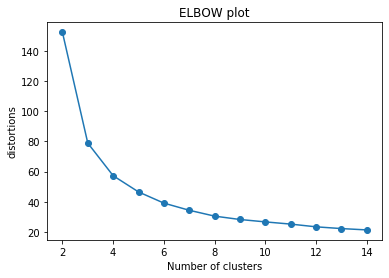

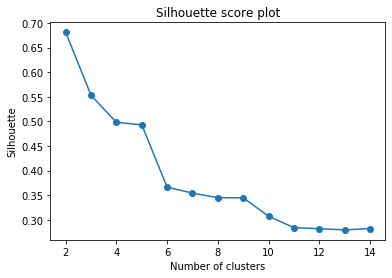

In [2]:
min_num, max_num = 2,15
# load the PCA files
X = load_iris().data
# test
distortions, silhouette_score_list =search_k_means_cluster(X, min_num, max_num)
plot_elbow(min_num, max_num, distortions, 'distortions', 'ELBOW plot')
plot_elbow(min_num, max_num, silhouette_score_list,'Silhouette', 'Silhouette score plot')

## Visualize clusters based on the optimal number

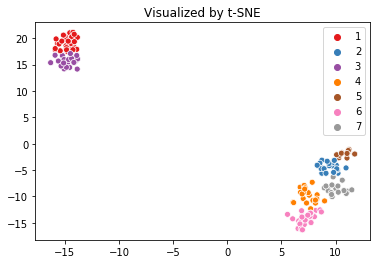

/Users/yuexichen/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


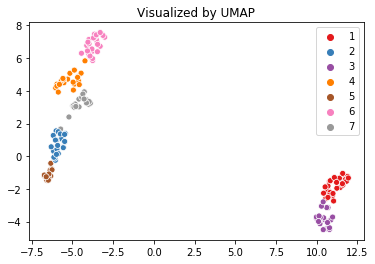

In [3]:
optimal_num = 7
_, y_km = run_kmeans(X, optimal_num)
# convert to 1-indexed
y_km = y_km + 1
vis_tsne(X, y_km) 
vis_umap(X, y_km)

In [4]:
print(y_km)
np.save("kmeans_membership.npy", y_km)

[1 3 3 3 1 1 3 1 3 3 1 3 3 3 1 1 1 1 1 1 1 1 3 1 3 3 1 1 1 3 3 1 1 1 3 3 1
 1 3 1 1 3 3 1 1 3 1 3 1 3 4 4 4 6 4 6 4 6 4 6 6 4 6 4 6 4 6 6 4 6 7 6 7 4
 4 4 4 4 4 6 6 6 6 7 6 4 4 4 6 6 6 4 6 6 6 6 6 4 6 6 2 7 5 2 2 5 6 5 2 5 2
 7 2 7 7 2 2 5 5 7 2 7 5 7 2 5 7 7 2 5 5 5 2 7 7 5 2 2 7 2 2 2 7 2 2 2 7 2
 2 7]
